<a href="https://colab.research.google.com/github/nicolassmarti/HE2_IA_P1/blob/main/monitoria_parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ü§ñ Inteligencia Artificial Aplicada para la Econom√≠a
## Universidad de los Andes

### üë®‚Äçüè´ Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilo-vega-169084b1/)
- **Profesor complementario:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergio-julian-zona-moreno/)


### Instalaci√≥n de Bibliotecas y Carga del Dataset

En esta secci√≥n se realiza la instalaci√≥n de todas las bibliotecas necesarias para trabajar, al igual que el dataset desde Kaggle.

In [4]:
!pip install kaggle ydata_profiling -q
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q fsspec==2024.10.0


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 485.4/485.4 kB 31.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 15.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 20.8 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # Quitar el l√≠mite de columnas a mostrar en un DataFrame
from google.colab import files
from numpy import sqrt
from ydata_profiling import ProfileReport
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, ConfusionMatrixDisplay

SEED = 2025

In [60]:
# Cargamos el dataset y lo mezclamos
dataset = load_dataset("13nishit/LoanApprovalPrediction")
print(dataset)

dataset = load_dataset("13nishit/LoanApprovalPrediction", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=2025).take(130)))

DatasetDict({
    train: Dataset({
        features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
        num_rows: 614
    })
})


/content
unzip:  cannot find or open life-expectancy-who.zip, life-expectancy-who.zip.zip or life-expectancy-who.zip.ZIP.


### 1. **Explicaci√≥n del dataset**

Aunque en el pasado se han realizado numerosos estudios sobre los factores que afectan la esperanza de vida, considerando variables demogr√°ficas, composici√≥n de ingresos y tasas de mortalidad, se encontr√≥ que no se hab√≠a tenido en cuenta el impacto de la inmunizaci√≥n y el √≠ndice de desarrollo humano. Adem√°s, parte de la investigaci√≥n anterior se bas√≥ en regresiones lineales m√∫ltiples utilizando datos de un solo a√±o para todos los pa√≠ses. Por lo tanto, surge la motivaci√≥n de abordar ambos factores mencionados mediante la formulaci√≥n de un modelo de regresi√≥n basado en efectos mixtos y regresi√≥n lineal m√∫ltiple, considerando datos del per√≠odo 2000 a 2015 para todos los pa√≠ses. Se incluir√°n inmunizaciones importantes como la de la Hepatitis B, la Polio y la Difteria.

En resumen, este estudio se centrar√° en factores de inmunizaci√≥n, mortalidad, factores econ√≥micos, sociales y otros factores relacionados con la salud. Dado que las observaciones de este conjunto de datos se basan en diferentes pa√≠ses, ser√° m√°s f√°cil para un pa√≠s determinar el factor predictivo que contribuye a un valor bajo de esperanza de vida. Esto ayudar√° a sugerir en qu√© √°rea debe enfocarse un pa√≠s para mejorar de manera eficiente la esperanza de vida de su poblaci√≥n.

La base de datos cuenta con el siguiente conjunto de variables sobre la expectativa de vida y factores de salud mundial:

| **Columna**                         | **Descripci√≥n**                                                                       |
|-------------------------------------|---------------------------------------------------------------------------------------|
| **Country**                         | Pa√≠s                                                                                  |
| **Year**                            | A√±o                                                                                   |
| **Status**                          | Estado: Desarrollado o en Desarrollo                                                   |
| **Life expectancy**                 | Expectativa de vida (a√±os)                                                             |
| **Adult Mortality**                 | Mortalidad adulta (probabilidad de morir entre 15 y 60 a√±os por cada 1000 personas)    |
| **Infant deaths**                   | N√∫mero de muertes infantiles por cada 1000 personas                                    |
| **Alcohol**                         | Consumo de alcohol per c√°pita (litros de alcohol puro)                                 |
| **Percentage expenditure**          | Gasto en salud como porcentaje del Producto Interno Bruto (PIB) per c√°pita (%)         |
| **Hepatitis B**                     | Cobertura de inmunizaci√≥n contra la Hepatitis B en ni√±os de 1 a√±o (%)                  |
| **Measles**                         | N√∫mero de casos reportados de sarampi√≥n por cada 1000 habitantes                       |
| **BMI**                             | √çndice de Masa Corporal promedio de toda la poblaci√≥n                                  |
| **Under-five deaths**               | N√∫mero de muertes en menores de 5 a√±os por cada 1000 nacidos vivos                     |
| **Polio**                           | Cobertura de inmunizaci√≥n contra la polio (Pol3) en ni√±os de 1 a√±o (%)                 |
| **Total expenditure**               | Gasto total del gobierno en salud como porcentaje del gasto p√∫blico total (%)          |
| **Diphtheria**                      | Cobertura de inmunizaci√≥n contra la difteria, el t√©tanos y la tos ferina (DTP3) (%)    |
| **HIV/AIDS**                        | Muertes por VIH/SIDA por cada 1000 nacidos vivos (ni√±os de 0-4 a√±os)                   |
| **GDP**                             | Producto Interno Bruto per c√°pita (en d√≥lares estadounidenses)                         |
| **Population**                      | Poblaci√≥n total del pa√≠s                                                               |
| **Thinness 1-19 years**             | Prevalencia de delgadez entre ni√±os y adolescentes de 10 a 19 a√±os (%)                 |
| **Thinness 5-9 years**              | Prevalencia de delgadez entre ni√±os de 5 a 9 a√±os (%)                                  |
| **Income composition of resources** | √çndice de Desarrollo Humano en t√©rminos de composici√≥n de ingresos (rango de 0 a 1)    |
| **Schooling**                       | N√∫mero de a√±os de escolaridad promedio                                                 |

In [8]:

df.columns = df.columns.str.strip()
df

In [ ]:
df.shape

(2938, 22)

Limpiamos nulos y datos malucos

In [61]:
from sklearn.impute import SimpleImputer
import numpy as np

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def categorize_features(df):
    """
    Separa las caracteriÃÅsticas en numeÃÅricas y categoÃÅricas.
    """
    # Variables numeÃÅricas (montos y edad)
    numeric_features = ['ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Loan_Amount_Term']

    # Variables categoÃÅricas
    categorical_features = [
        'Gender', 'Married', 'Education',
        'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Dependents']

def clean_categorical_data(df):
    """
    Limpia y corrige valores en variables categoÃÅricas.
    """
    df = df.copy()

def preprocess_data(df):
    """
    Realiza el preprocesamiento completo de los datos.
    """
    # 1. Separar features
    numeric_features, categorical_features = categorize_features(df)

    # 2. Limpiar datos categoÃÅricos
    df = clean_categorical_data(df)

    # 3. Reemplazar "3+" por "3" en Dependents y convertir a numeÃÅrico
    df['Dependents'] = df['Dependents'].replace('3+', '3').astype(float)

    # 4. Estandarizar variables numeÃÅricas
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # 5. Codificar variable objetivo Loan_Status (Y -> 1, N -> 0)
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

    # 6. Codificar otras Variables
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

    # 7. Crear dummies para Property_Area
    df = pd.get_dummies(df, columns=['Property_Area'], prefix='', prefix_sep='')
    # Convertir solo las columnas dummy a int. Rellenar NaNs con 0 en columnas numeÃÅricas.
    for col in ['Rural', 'Semiurban', 'Urban']:
        df[col] = df[col].fillna(0).astype(int)

    # 8. Crear dummies para Gender
    df = pd.get_dummies(df, columns=['Gender'], prefix='', prefix_sep='')
    # Convertir solo las columnas dummy a int. Rellenar NaNs con 0 en columnas numeÃÅricas.
    for col in ['Female', 'Male']:
        df[col] = df[col].fillna(0).astype(int)

    # 9. Revisar si Loan_ID
    print("Valores uÃÅnicos en Loan_ID:", df['Loan_ID'].nunique())
    print("NuÃÅmero de filas:", len(df))
    # Al ser valores unicos se puedes eliminar
    # Guardar los IDs (opcional)
    loan_ids = df['Loan_ID']
    # Eliminar la columna de ID
    df = df.drop(columns=['Loan_ID'])
    # Verificar que la columna se eliminoÃÅ
    print("Columnas despueÃÅs de eliminar Loan_ID:", df.columns)

    # 10. ImputacioÃÅn de valores nulos
    # ImputacioÃÅn con la moda para columnas categoÃÅricas
    imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
    columns_median = ['Married', 'Self_Employed', 'Dependents', 'Credit_History']
    df[columns_median] = imputer_median.fit_transform(df[columns_median])

    # ImputacioÃÅn con la media para columnas numeÃÅricas
    imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    columns_mean = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
    df[columns_mean] = imputer_mean.fit_transform(df[columns_mean])

    # 11. Verificar que no queden valores nulos
    print("\nValores nulos despueÃÅs de la imputacioÃÅn:")
    print(df.isnull().sum())

    #12. Eliminamos Valores nulos para Loan_Amount_Term
    df = df.dropna(subset=['Loan_Amount_Term'])

    # Verificar que las filas se han eliminado
    print("NuÃÅmero de filas despueÃÅs de eliminar valores nulos en 'Loan_Amount_Term':", len(df))
    print("\nValores nulos despueÃÅs de la eliminacioÃÅn:")
    print(df.isnull().sum())

    # 13. Separar features y target
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # 14. Guardar informacioÃÅn del preprocesamiento
    preprocessing_info = {
        'numeric_features': numeric_features,
        'categorical_features': categorical_features,
        'scaler': scaler,
        'imputer_mode': imputer_median,
        'imputer_mean': imputer_mean
    }

    return X, y, preprocessing_info

X,y ,preprocessing_info = preprocess_data(df)


# Divisi√≥n de los datos en Train y Test de manera aleatoria
df_train, df_test = train_test_split(df, test_size=0.2 , random_state=SEED)
display(df_train.head())
display(df_test.head())
print(X.info())
print(X.isnull().sum())

TypeError: cannot unpack non-iterable NoneType object

### 2. **An√°lisis descriptivo**

El conjunto de datos de "Life Expectancy (WHO)" de Kaggle contiene informaci√≥n sobre la expectativa de vida, factores de salud, y otras variables socioecon√≥micas para diversos pa√≠ses.

Se realiza un an√°lisis descriptivo para explorar las caracter√≠sticas principales y obtener una mejor comprensi√≥n de los datos antes de realizar los modelos predictivos.

In [54]:
# Resumen de las columnas, tipos de datos y valores faltantes
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 8 to 62
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            104 non-null    object 
 1   Married            104 non-null    float64
 2   Dependents         102 non-null    float64
 3   Education          104 non-null    int64  
 4   Self_Employed      100 non-null    float64
 5   ApplicantIncome    104 non-null    float64
 6   CoapplicantIncome  104 non-null    float64
 7   LoanAmount         101 non-null    float64
 8   Loan_Amount_Term   103 non-null    float64
 9   Credit_History     104 non-null    float64
 10  Loan_Status        104 non-null    int64  
 11  Rural              104 non-null    int64  
 12  Semiurban          104 non-null    int64  
 13  Urban              104 non-null    int64  
 14  Female             104 non-null    int64  
 15  Male               104 non-null    int64  
 16  Unknown            104 non-null 

In [39]:
# An√°lisis descriptivo de los datos de entrenamiento
reporte = ProfileReport(df, title="Profiling Report")
reporte.to_file("report.html")
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

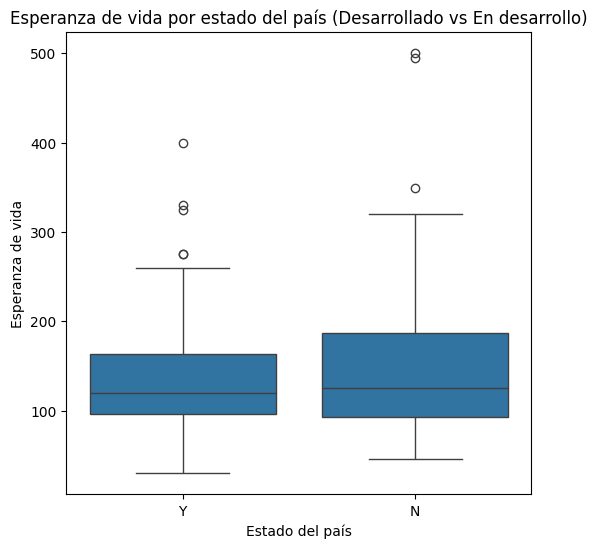

In [16]:
# Boxplot para comparar 'Life expectancy' seg√∫n 'Status' (desarrollado/desarrollo)
plt.figure(figsize=(6, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Esperanza de vida por estado del pa√≠s (Desarrollado vs En desarrollo)')
plt.xlabel('Estado del pa√≠s')
plt.ylabel('Esperanza de vida')
plt.show()

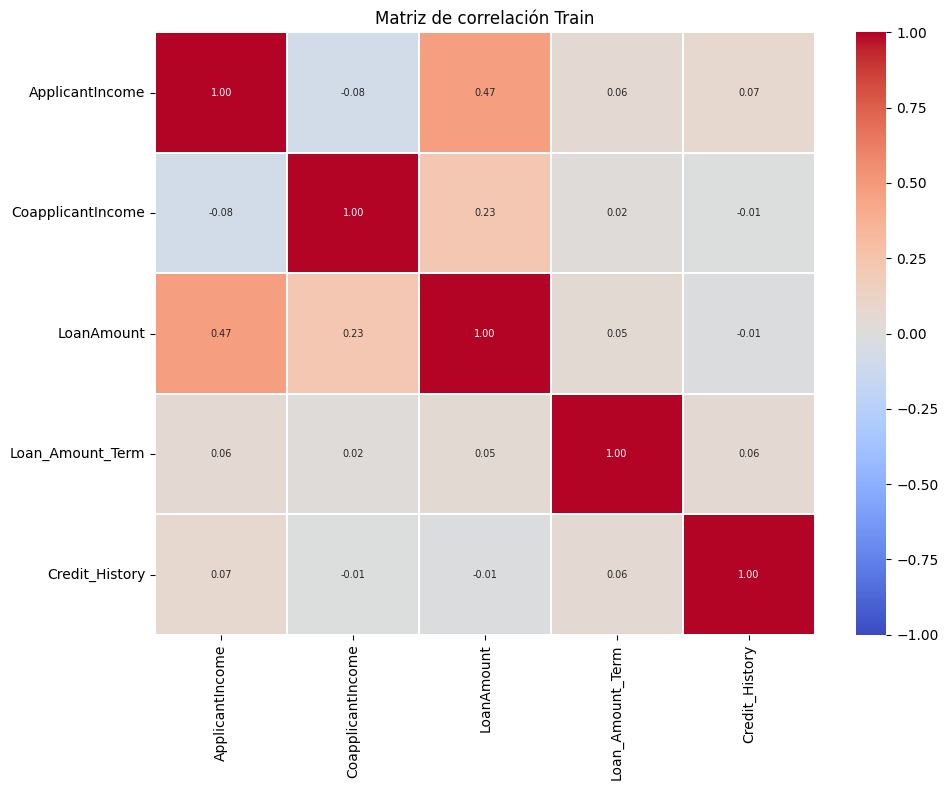

In [17]:
# Seleccionar solo las columnas num√©ricas
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlaci√≥n
correlation_matrix = numeric_df.corr()

# Grafico
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlaci√≥n Train', fontsize=12)
plt.tight_layout()
plt.show()

*   **¬øQu√© teor√≠as puede plantear a partir de este an√°lisis sobre la variable objetivo?**

  A partir del an√°lisis, se puede afirmar que los pa√≠ses con mejores sistemas de salud y educaci√≥n tienden a tener una mayor esperanza de vida, tal como lo indica la alta correlaci√≥n entre la esperanza de vida y variables como el √≠ndice de masa corporal (BMI), la escolaridad y la composici√≥n de ingresos. Este hallazgo respalda la teor√≠a de que la salud de una poblaci√≥n est√° fuertemente condicionada por el acceso a recursos econ√≥micos y la calidad de la infraestructura educativa.

  Adem√°s, la correlaci√≥n negativa entre la esperanza de vida y variables como la mortalidad infantil y la mortalidad de menores de cinco a√±os refuerza la idea de que mejoras en las condiciones sanitarias y el acceso a servicios m√©dicos de calidad reducen la mortalidad infantil, lo que a su vez incrementa la longevidad general de la poblaci√≥n.
  
*   **¬øExisten variables con alta correlaci√≥n?**

  Hay algunas variables que muestran alta correlaci√≥n entre ellas. Por ejemplo:

  **Thinness 1-19 years** y **thinness 5-9 years** tienen una correlaci√≥n de 0.94, lo que sugiere que son pr√°cticamente redundantes.

  **infant deaths** y **under-five deaths** tambi√©n tienen una correlaci√≥n alta (0.91), lo que indica que representan informaci√≥n similar, por lo que podr√≠a ser redundante incluir ambas.

  **Schooling** y **Income composition** of resources tienen una correlaci√≥n de 0.80, indicando una fuerte relaci√≥n entre el acceso a la educaci√≥n y la composici√≥n de ingresos.

*   **¬øHay variables que se podr√≠an eliminar? ¬øPor qu√©?**

  Para la creaci√≥n de modelos de IA tradicionales, se podr√≠a considerar eliminar variables que est√©n altamente correlacionadas, ya que no aportan informaci√≥n nueva y pueden generar multicolinealidad. En este aspecto, la variable de a√±o Year fue eliminada del conjunto de datos para optimizar el rendimiento y la relevancia del modelo de clasificaci√≥n. Aunque el a√±o en que se registraron los datos puede parecer una caracter√≠stica temporal valiosa, su inclusi√≥n podr√≠a introducir sesgos irrelevantes y no aportar informaci√≥n significativa sobre la expectativa de vida. Adem√°s, al eliminar Year, se reduce la complejidad del modelo, evitando posibles problemas de multicolinealidad con otras variables temporales o econ√≥micas que ya capturan tendencias a lo largo del tiempo. Esta decisi√≥n facilita que el modelo se enfoque en los factores directamente relacionados con la expectativa de vida, mejorando as√≠ su capacidad de generalizaci√≥n y precisi√≥n predictiva.


### 3. Procesamiento inicial

In [18]:
# Eliminar valores NA de la variable de interes
df_train = df_train.dropna(subset=['Loan_Status'])
df_test = df_test.dropna(subset=['Loan_Status'])

In [19]:
# Ahora separamos los datos de entrada en X como variables explicativas y la variable a predecir Y en df_train
X_train, y_train = df_train.drop(['Loan_Status'], axis=1), df_train['Loan_Status']
display(X_train.head())
y_train.head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
8    LP001013    Male     Yes          0  Not Graduate            No   
58   LP001155  Female     Yes          0  Not Graduate            No   
106  LP001379    Male     Yes          2      Graduate            No   
125  LP002821    Male      No          0  Not Graduate           Yes   
93   LP001693  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
8               2333             1516.0        95.0             360.0   
58              1928             1644.0       100.0             360.0   
106             3800             3600.0       216.0             360.0   
125             5800                0.0       132.0             360.0   
93              3244                0.0        80.0             360.0   

     Credit_History Property_Area  
8               1.0         Urban  
58              1.0     Semiurban  
106             0.0         Urban  
125             1.0     Semiurban  
93              1.0         Urban

8      Y
58     Y
106    N
125    Y
93     Y
Name: Loan_Status, dtype: object

In [20]:
# Ahora separamos los datos de entrada en X como variables explicativas y la variable a predecir Y en df_train
X_test, y_test = df_test.drop(['Loan_Status'], axis=1), df_test['Loan_Status']
display(X_test.head())
y_test.head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
46  LP002533    Male     Yes          2  Graduate            No   
19  LP002524    Male      No          2  Graduate            No   
60  LP001516  Female     Yes          2  Graduate            No   
47  LP002820    Male     Yes          0  Graduate            No   
82  LP002697    Male      No          0  Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
46             2947             1603.0         NaN             360.0   
19             5532             4648.0       162.0             360.0   
60            14866                0.0        70.0             360.0   
47             5923             2054.0       211.0             360.0   
82             4680             2087.0         NaN             360.0   

    Credit_History Property_Area  
46             1.0         Urban  
19             1.0         Rural  
60             1.0         Urban  
47             1.0         Rural  
82             1.0     Semiurban

46    N
19    Y
60    Y
47    Y
82    N
Name: Loan_Status, dtype: object

In [21]:
# Eliminamos la variable Loan_ID
X_train = X_train.drop(['Loan_ID'], axis=1)
X_test = X_test.drop(['Loan_ID'], axis=1)

display(X_train.head())
display(X_test.head())

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
8      Male     Yes          0  Not Graduate            No             2333   
58   Female     Yes          0  Not Graduate            No             1928   
106    Male     Yes          2      Graduate            No             3800   
125    Male      No          0  Not Graduate           Yes             5800   
93   Female      No          0      Graduate            No             3244   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
8               1516.0        95.0             360.0             1.0   
58              1644.0       100.0             360.0             1.0   
106             3600.0       216.0             360.0             0.0   
125                0.0       132.0             360.0             1.0   
93                 0.0        80.0             360.0             1.0   

    Property_Area  
8           Urban  
58      Semiurban  
106         Urban  
125     Semiurban  
93          Urban

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
46    Male     Yes          2  Graduate            No             2947   
19    Male      No          2  Graduate            No             5532   
60  Female     Yes          2  Graduate            No            14866   
47    Male     Yes          0  Graduate            No             5923   
82    Male      No          0  Graduate            No             4680   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
46             1603.0         NaN             360.0             1.0   
19             4648.0       162.0             360.0             1.0   
60                0.0        70.0             360.0             1.0   
47             2054.0       211.0             360.0             1.0   
82             2087.0         NaN             360.0             1.0   

   Property_Area  
46         Urban  
19         Rural  
60         Urban  
47         Rural  
82     Semiurban

In [22]:
X_train.isnull().sum() #¬øQu√© hace esta cosa?

Gender               1
Married              0
Dependents           2
Education            0
Self_Employed        4
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           3
Loan_Amount_Term     1
Credit_History       8
Property_Area        0
dtype: int64

In [23]:
X_test.isnull().sum()

Gender               0
Married              1
Dependents           1
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           3
Loan_Amount_Term     0
Credit_History       2
Property_Area        0
dtype: int64

Para mejorar la calidad de los datos y garantizar la precisi√≥n del an√°lisis, se eliminaron o corrigieron las filas con valores da√±ados o no √∫tiles. Utilizamos el m√©todo de imputaci√≥n con la estrategia de promedio para reemplazar los valores nulos en variables clave. Este enfoque evita la p√©rdida de datos valiosos y reduce el sesgo que podr√≠a generar la eliminaci√≥n directa de filas, asegurando as√≠ la coherencia y completitud del conjunto de datos.

**Eliminaci√≥n variable de A√±o. ¬øQu√© cree que cambie con series de tiempo?**

Se elimin√≥ la columna del A√±o porque incorporar series de tiempo en las predicciones requiere enfoques espec√≠ficos, como modelos recurrentes (ver ventanas de tiempo), que no hemos cubierto en clase. Al omitir esta variable temporal, el modelo se enfoca en factores est√°ticos que influyen directamente en la esperanza de vida. Incorporar series de tiempo en el an√°lisis de la esperanza de vida introducir√≠a din√°micas temporales como tendencias y estacionalidades que actualmente no se consideran. Esto requerir√≠a modelos espec√≠ficos, como redes neuronales recurrentes (RNN), capaces de capturar dependencias a lo largo del tiempo. Adem√°s, el preprocesamiento de los datos se volver√≠a m√°s complejo, ya que habr√≠a que manejar la secuenciaci√≥n y potencialmente ajustar el modelo para considerar cambios hist√≥ricos y futuros. En resumen, el uso de series de tiempo enriquecer√≠a el an√°lisis pero aumentar√≠a la complejidad del modelado.

Cuando se trabaja con series de tiempo, el enfoque cambia porque las observaciones est√°n temporalmente correlacionadas.

Tambi√©n, al incorporar series de tiempo, se deben tener en cuenta patrones como tendencias a largo plazo (p. ej., mejora sostenida en la esperanza de vida) y estacionalidad (patrones c√≠clicos a lo largo de los a√±os).


=== Resumen del Preprocesamiento ===
Dimensiones de X: (130, 16)

Distribuci√≥n de clases:
Loan_Status
1    0.692
0    0.308
Name: proportion, dtype: float64

Estad√≠sticas de algunas variables num√©ricas:
       Married  Dependents  Education  Self_Employed  ApplicantIncome  \
count   129.00      127.00     130.00         123.00           130.00   
mean      0.65        0.00       0.82           0.19             0.00   
std       0.48        1.00       0.38           0.39             1.00   
min       0.00       -0.83       0.00           0.00            -1.15   
25%       0.00       -0.83       1.00           0.00            -0.54   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
count             130.00      124.00            129.00          130.00   
mean                0.00       -0.00              0.00            0.78   
std                 1.00        1.00              1.00            0.41   
min                -0.61       -1.41             -5.24    

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP002978  Female      No          0      Graduate            No   
1    LP001369    Male     Yes          2      Graduate            No   
2    LP002110    Male     Yes          1      Graduate          None   
3    LP002984    Male     Yes          2      Graduate            No   
4    LP002300  Female      No          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
125  LP002821    Male      No          0  Not Graduate           Yes   
126  LP002618    Male     Yes          1  Not Graduate            No   
127  LP001586    Male     Yes         3+  Not Graduate            No   
128  LP002768    Male      No          0  Not Graduate            No   
129  LP001519  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               2900                0.0        71.0             360.0   
1              11417             1126.0       225.0             360.0   
2               5250              688.0       160.0             360.0   
3               7583                0.0       187.0             360.0   
4               1963                0.0        53.0             360.0   
..               ...                ...         ...               ...   
125             5800                0.0       132.0             360.0   
126             4050             5302.0       138.0             360.0   
127             3522                0.0        81.0             180.0   
128             3358                0.0        80.0              36.0   
129            10000             1666.0       225.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Rural           Y  
1               1.0         Urban           Y  
2               1.0         Rural           Y  
3               1.0         Urban           Y  
4               1.0     Semiurban           Y  
..              ...           ...         ...  
125             1.0     Semiurban           Y  
126             NaN         Rural           N  
127             1.0         Rural           N  
128             1.0     Semiurban           N  
129             1.0         Rural           N  

[130 rows x 13 columns]

In [ ]:
X_train.isnull().sum()

Country                            0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
X_train.isnull().sum()

Country                            0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Modificar el nombre de los paises por un ranking
country_life_expectancy = df.groupby('Country')['Life expectancy'].mean().sort_values()
country_ranking = {country: rank for rank, country in enumerate(country_life_expectancy.index)}

X_train['Country'] = X_train['Country'].map(country_ranking)
X_test['Country'] = X_test['Country'].map(country_ranking)

LE = LabelEncoder()

# Se transforma la variable 'Status' a bool, donde Developing = 1
X_train['Status'] = LE.fit_transform(X_train['Status'])
X_test['Status'] = LE.transform(X_test['Status'])

display(X_train.head())
display(X_test.head())

Country  Status  Adult Mortality  infant deaths  Alcohol  \
2614       54       1            261.0              3     0.48   
1459      124       1             99.0              1     1.32   
49          3       1            348.0             67     8.33   
2911       13       1            363.0             30     2.47   
436         6       1            419.0             60     3.13   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
2614                5.649123    80.947313        0  12.6                  4   
1459              140.377136    81.000000      112  65.4                  1   
49                 23.965612    64.000000    11699  22.7                101   
2911              184.364910    83.000000    15754   2.7                 45   
436                 0.000000    62.000000      628  25.6                 83   

      Polio  Total expenditure  Diphtheria  HIV/AIDS          GDP  \
2614   38.0               3.89        54.0       0.1    48.615520   
1459   75.0               6.39        81.0       0.1  8161.461400   
49     68.0               3.31        64.0       2.0   479.312240   
2911    8.0               4.41        83.0       6.8  1463.213573   
436    58.0               6.42        62.0       3.3  7523.666340   

        Population  thinness  1-19 years  thinness 5-9 years  \
2614  9.238250e+05                  12.1                12.1   
1459  5.632790e+05                   4.8                 4.9   
49    2.692466e+06                   8.5                 8.3   
2911  1.385330e+05                   6.7                 6.5   
436   1.270250e+07                   6.1                 6.0   

      Income composition of resources  Schooling  
2614                         0.475000   9.800000  
1459                         0.763000  13.300000  
49                           0.527000  11.400000  
2911                         0.533000  11.800000  
436                          0.628166  12.028339

Country  Status  Adult Mortality  infant deaths  Alcohol  \
2616       54       1            276.0              3     0.50   
338        24       1            286.0              2     0.01   
1116       58       1            238.0              1     7.35   
1914      174       0             67.0              0     6.53   
1508       91       1            134.0              2     0.01   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
2616               49.069672    81.014675        0  11.9                  4   
338                 1.117811    95.000000        1  36.8                  2   
1116               17.464059    93.000000        0  39.0                  1   
1914              277.355052    81.014675       39  59.4                  0   
1508                0.000000    96.000000        0  62.8                  2   

          Polio  Total expenditure  Diphtheria  HIV/AIDS          GDP  \
2616  82.094664               3.26   81.287435       0.1   422.286330   
338   96.000000               5.84   95.000000       2.8    77.625783   
1116  93.000000               5.83   93.000000       1.8   198.455216   
1914  94.000000               9.14   94.000000       0.1  1574.986100   
1508  96.000000               4.33   96.000000       0.1  7377.855152   

        Population  thinness  1-19 years  thinness 5-9 years  \
2616  8.716700e+04                  12.2                12.2   
338   2.128570e+05                   7.0                 6.7   
1116  7.594600e+04                   5.7                 5.5   
1914  4.953880e+05                   0.7                 0.7   
1508  1.300791e+07                   5.7                 5.5   

      Income composition of resources  Schooling  
2616                            0.000        0.0  
338                             0.693       12.6  
1116                            0.619       11.4  
1914                            0.939       17.6  
1508                            0.735       13.4

In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
display(pd.DataFrame(X_train_scaled, columns=X_train.columns))

# Solo transformar el conjunto de prueba (sin ajustar nuevamente)
X_test_scaled = scaler.transform(X_test)
display(pd.DataFrame(X_test_scaled, columns=X_test.columns))

Country    Status  Adult Mortality  infant deaths   Alcohol  \
0    -0.716733  0.469497         0.773663      -0.230318 -1.060227   
1     0.607493  0.469497        -0.526855      -0.246310 -0.845926   
2    -1.681527  0.469497         1.472089       0.281429  0.942469   
3    -1.492352  0.469497         1.592508      -0.014425 -0.552537   
4    -1.624774  0.469497         2.042070       0.225456 -0.384158   
...        ...       ...              ...            ...       ...   
2337  0.796668  0.469497        -1.177114      -0.246310 -1.039817   
2338 -0.224878  0.469497         0.275934       0.001567 -1.180133   
2339  0.985844  0.469497        -0.583050      -0.254306 -0.006579   
2340 -1.492352  0.469497         1.616591      -0.022421 -0.527025   
2341 -1.265341  0.469497         1.271392      -0.142362 -0.873989   

      percentage expenditure  Hepatitis B   Measles       BMI  \
0                  -0.373665     0.000000 -0.213006 -1.291076   
1                  -0.304627     0.002338 -0.204134  1.350763   
2                  -0.364280    -0.752030  0.713645 -0.785724   
3                  -0.282086     0.091087  1.034833 -1.786420   
4                  -0.376560    -0.840779 -0.163263 -0.640623   
...                      ...          ...       ...       ...   
2337                0.156690     0.756706 -0.211501  0.655279   
2338               -0.354257    -0.840779 -0.108689  1.005523   
2339               -0.021024     0.490459 -0.211263  0.790373   
2340               -0.282762     0.002338  0.835229 -0.860776   
2341               -0.355058     0.091087 -0.203501 -0.850769   

      under-five deaths     Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0             -0.236084 -1.929478          -0.849230   -1.230790 -0.321797   
1             -0.253753 -0.330995           0.181592   -0.068021 -0.321797   
2              0.335194 -0.633410          -1.088381   -0.800134  0.057855   
3              0.005384 -3.225545          -0.634819    0.018110  1.016974   
4              0.229184 -1.065433           0.193962   -0.886266  0.317616   
...                 ...       ...                ...         ...       ...   
2337          -0.253753  0.576253          -1.286299    0.664093 -0.321797   
2338          -0.029953 -0.676612          -0.168888   -0.800134 -0.321797   
2339          -0.259642  0.187432           1.645360    0.405700 -0.321797   
2340          -0.000505  0.014623          -0.696669   -0.068021  0.917066   
2341          -0.135963  0.014623          -0.238984    0.018110  0.417524   

           GDP    Population  thinness  1-19 years  thinness 5-9 years  \
0    -0.569186 -2.185846e-01              1.626700            1.581782   
1     0.048565 -2.252755e-01             -0.009679            0.004389   
2    -0.536391 -1.857627e-01              0.819718            0.749269   
3    -0.461472 -2.331578e-01              0.416228            0.354921   
4     0.000000  3.456634e-17              0.281731            0.245380   
...        ...           ...                   ...                 ...   
2337  0.705152  3.456634e-17              0.461060            0.420646   
2338 -0.521585 -2.356624e-01              0.102402            0.048206   
2339 -0.213738 -2.350516e-01             -0.525250           -0.521408   
2340 -0.447659  2.899190e-02              0.393812            0.333013   
2341 -0.535735 -2.236113e-01              0.550725            0.508278   

      Income composition of resources     Schooling  
0                           -0.742677 -6.844869e-01  
1                            0.653787  3.906205e-01  
2                           -0.490537 -1.930092e-01  
3                           -0.461444 -7.013981e-02  
4                            0.000000  5.456498e-16  
...                               ...           ...  
2337                         0.745915  1.141643e-01  
2338                         0.144660 -5.923348e-01  
2339                         0.484078  5.749246e-01  
2340               

Country    Status  Adult Mortality  infant deaths   Alcohol  \
0   -0.716733  0.469497         0.894081      -0.230318 -1.055124   
1   -1.284259  0.469497         0.974360      -0.238314 -1.180133   
2   -0.641063  0.469497         0.589022      -0.246310  0.692451   
3    1.553369 -2.129940        -0.783748      -0.254306  0.483252   
4   -0.016785  0.469497        -0.245879      -0.238314 -1.180133   
..        ...       ...              ...            ...       ...   
581  0.380483  0.469497        -0.422493      -0.086389 -1.047471   
582 -1.624774  0.469497         1.985874       0.217460 -0.379055   
583 -1.284259  0.469497         4.129321      -0.238314  0.215376   
584 -1.530187  0.469497         2.090237       0.337401 -0.919911   
585 -0.678898  0.469497        -1.169086      -0.254306 -0.026998   

     percentage expenditure  Hepatitis B   Measles       BMI  \
0                 -0.351415     0.002989 -0.213006 -1.326100   
1                 -0.375987     0.623582 -0.212926 -0.080233   
2                 -0.367611     0.534833 -0.213006  0.029844   
3                 -0.234435     0.002989 -0.209917  1.050554   
4                 -0.376560     0.667957 -0.213006  1.220673   
..                      ...          ...       ...       ...   
581               -0.097567     0.623582 -0.211025  0.940478   
582               -0.376560    -3.237008 -0.209204 -0.580581   
583               -0.219268     0.268586 -0.212926 -1.746393   
584               -0.348914    -0.263910 -0.191857 -0.955842   
585               -0.376560     0.667957 -0.213006 -1.726379   

     under-five deaths     Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0            -0.236084 -0.024489          -1.108998   -0.055642 -0.321797   
1            -0.247863  0.576253          -0.045189    0.534897  0.217708   
2            -0.253753  0.446646          -0.049312    0.448766  0.017891   
3            -0.259642  0.489848           1.315497    0.491831 -0.321797   
4            -0.247863  0.576253          -0.667806    0.577962 -0.321797   
..                 ...       ...                ...         ...       ...   
581          -0.118295  0.533050           0.482592    0.534897 -0.321797   
582           0.217405 -0.158186          -0.057559   -3.211804  0.137781   
583          -0.236084  0.619455          -0.090545    0.621028  7.091396   
584           0.376421 -0.330995          -0.288463   -0.326414  2.475635   
585          -0.259642  0.576253          -0.040617    0.577962 -0.301815   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0   -0.540733   -0.234111              1.649116            1.603690   
1   -0.566977   -0.231778              0.483476            0.398737   
2   -0.557776   -0.234319              0.192066            0.135839   
3   -0.452961   -0.226535             -0.928741           -0.915756   
4   -0.011103    0.005668              0.192066            0.135839   
..        ...         ...                   ...                 ...   
581 -0.156234    0.475745              0.236899            0.201563   
582 -0.011103    0.005668              0.214483            0.179655   
583 -0.334632   -0.203161              1.559451            1.516057   
584 -0.540744    0.176036             -0.233840           -0.258510   
585 -0.449180   -0.232100              0.147234            0.092022   

     Income composition of resources  Schooling  
0                          -3.045872  -3.694788  
1                           0.314369   0.175599  
2                          -0.044445  -0.193009  
3                           1.507182   1.711467  
4                           0.518020   0.421338  
..                               ...        ...  
581                         0.527718   0.728511  
582                        -0.018171  -0.044208  
583                        -0.330526  -0.070140  
584                        -1.300292  -1.175965  
585                        -0.306282  -0.254444  

[586 rows x 20 columns]

In [ ]:
def categorize_life_expectancy(y):
    if y < 62:
        return 'Low life expectancy'
    elif 62 <= y <= 75:
        return 'Medium life expectancy'
    else:
        return 'High life expectancy'

y_train_class = y_train.apply(categorize_life_expectancy)
y_test_class = y_test.apply(categorize_life_expectancy)

# Por si queremos aplicar OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# y_train_class_encoder = encoder.fit_transform(y_train_class.values.reshape(-1, 1))
# y_test_class_encoder = encoder.transform(y_test_class.values.reshape(-1, 1))

# print(f"y_train_class_encoded shape: {y_train_class_encoder.shape}")
# print(f"y_test_class_encoded shape: {y_test_class_encoder.shape}")

In [ ]:
display(y_train)
display(y_test_class)

2614    62.0
1459    74.8
49      51.7
2911    58.0
436     51.7
        ... 
1932    75.4
1235    67.9
323     76.8
2910    58.2
2622    57.4
Name: Life expectancy, Length: 2342, dtype: float64

2616       Low life expectancy
338     Medium life expectancy
1116    Medium life expectancy
1914      High life expectancy
1508    Medium life expectancy
                 ...          
34        High life expectancy
434        Low life expectancy
350        Low life expectancy
1772       Low life expectancy
2217    Medium life expectancy
Name: Life expectancy, Length: 586, dtype: object

## Modelos

#### Regresi√≥n

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
def train_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}
    best_estimators = {}

    for name, model in models.items():
        print(f"Entrenando {name}...")

        # B√∫squeda de hiperpar√°metros con GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Mejor modelo encontrado
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model  # Guardar el mejor modelo

        y_pred = best_model.predict(X_test)

        # Evaluar m√©tricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "Best Params": grid_search.best_params_
        }

        print(f"\nüîπ Mejor estimador para {name}:\n{best_model}")
        print(f"üîπ Mejores hiperpar√°metros: {grid_search.best_params_}\n")

    return results, best_estimators

In [ ]:
# Definici√≥n de modelos
models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVM": SVR(),
    "Random Forest Regressor": RandomForestRegressor(random_state=SEED)
}

In [ ]:
 # Definici√≥n de hiperpar√°metros para GridSearch
param_grids = {
    "Lasso": {"alpha": [0.01, 0.1, 1, 10], 'selection':['cyclic', 'random']},
    "Ridge": {"alpha": [0.01, 0.1, 1, 10]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Random Forest Regressor": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
}

In [ ]:
# Ejecutar entrenamiento y evaluaci√≥n con impresi√≥n de los mejores modelos
results, best_estimators = train_and_evaluate(models, param_grids, X_train_scaled, y_train, X_test_scaled, y_test)

Entrenando Lasso...

üîπ Mejor estimador para Lasso:
Lasso(alpha=0.01)
üîπ Mejores hiperpar√°metros: {'alpha': 0.01, 'selection': 'cyclic'}

Entrenando Ridge...

üîπ Mejor estimador para Ridge:
Ridge(alpha=0.1)
üîπ Mejores hiperpar√°metros: {'alpha': 0.1}

Entrenando SVM...

üîπ Mejor estimador para SVM:
SVR(C=10)
üîπ Mejores hiperpar√°metros: {'C': 10, 'kernel': 'rbf'}

Entrenando Random Forest Regressor...

üîπ Mejor estimador para Random Forest Regressor:
RandomForestRegressor(max_depth=20, n_estimators=200, random_state=2025)
üîπ Mejores hiperpar√°metros: {'max_depth': 20, 'n_estimators': 200}



In [ ]:
# Convertir resultados a DataFrame
results_df = pd.DataFrame(results).T
results_df

MSE      RMSE       MAE  \
Lasso                    6.857893  2.618758  1.976613   
Ridge                    6.690736  2.586646  1.946609   
SVM                       3.97045  1.992599  1.291801   
Random Forest Regressor   2.67711  1.636188  1.014814   

                                                    Best Params  
Lasso                    {'alpha': 0.01, 'selection': 'cyclic'}  
Ridge                                            {'alpha': 0.1}  
SVM                                  {'C': 10, 'kernel': 'rbf'}  
Random Forest Regressor  {'max_depth': 20, 'n_estimators': 200}

<Figure size 1000x600 with 0 Axes>

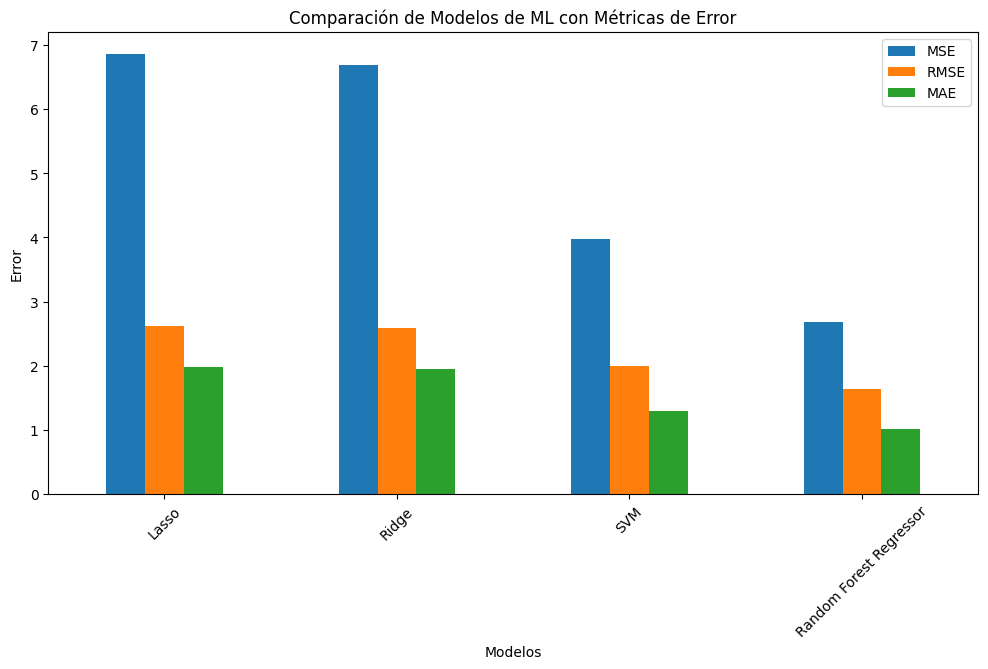

In [ ]:
# Graficar resultados
plt.figure(figsize=(10, 6))
results_df[['MSE', 'RMSE', 'MAE']].plot(kind='bar', figsize=(12,6))
plt.title("Comparaci√≥n de Modelos de ML con M√©tricas de Error")
plt.xlabel("Modelos")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

#### Clasificaci√≥n

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Funci√≥n para entrenar y evaluar modelos de clasificaci√≥n
def train_and_evaluate_classification(models, param_grids, X_train, y_train, X_test, y_test, scoring='accuracy'):
    results = {}
    best_estimators = {}

    for name, model in models.items():
        print(f"Entrenando {name}...")

        # B√∫squeda de hiperpar√°metros con GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring=scoring, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Mejor modelo encontrado
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model

        # Predicciones en train y test
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Evaluar m√©tricas
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')
        f1 = f1_score(y_test, y_test_pred, average='weighted')

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Best Params": grid_search.best_params_
        }

        print(f"\nüîπ Mejor estimador para {name}:{best_model}")
        print(f"üîπ Mejores hiperpar√°metros: {grid_search.best_params_}\n")

        # Matriz de confusi√≥n en Train y Test
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)

        axes[0].set_title(f"{name} - Train Set")
        disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

        axes[1].set_title(f"{name} - Test Set")
        disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

        print()
        plt.show()
        print()

    return results, best_estimators

### **SMOTE: Synthetic Minority Over-sampling Technique**

#### Introducci√≥n

En problemas de clasificaci√≥n con conjuntos de datos desbalanceados, los modelos tienden a favorecer la clase mayoritaria, lo que puede afectar la precisi√≥n y generalizaci√≥n del modelo. **SMOTE (Synthetic Minority Over-sampling Technique)** es una t√©cnica que aborda este desbalance generando ejemplos sint√©ticos de la clase minoritaria, en lugar de simplemente replicar instancias existentes.

#### ¬øC√≥mo funciona SMOTE?

1. **Selecci√≥n de vecinos m√°s cercanos**: Para cada instancia de la clase minoritaria, se identifican sus *k* vecinos m√°s cercanos en el espacio de caracter√≠sticas.
2. **Generaci√≥n de ejemplos sint√©ticos**: Para cada vecino seleccionado, se crea un nuevo ejemplo sint√©tico mediante la interpolaci√≥n lineal entre la instancia original y el vecino. Esto se logra con la f√≥rmula:

   $x_{\text{nuevo}} = x_i + \delta \times (x_{\text{vecino}} - x_i)$

   donde $x_i$ es la instancia original, $x_{\text{vecino}}$ es uno de sus vecinos m√°s cercanos, y $\delta$ es un n√∫mero aleatorio en el intervalo $[0, 1]$.

3. **Aumento del conjunto de datos**: Los ejemplos sint√©ticos generados se a√±aden al conjunto de datos, equilibrando as√≠ la proporci√≥n entre las clases.

#### Consideraciones al utilizar SMOTE

- **No aporta nueva informaci√≥n real**: Los ejemplos sint√©ticos se generan a partir de combinaciones de instancias existentes, por lo que no introducen nueva informaci√≥n al modelo.
- **Posible generaci√≥n de ruido**: Si las clases no est√°n claramente separadas, SMOTE puede crear ejemplos sint√©ticos que se solapan con la clase mayoritaria, introduciendo ruido y afectando negativamente al rendimiento del modelo.
- **Efectividad variable seg√∫n el algoritmo**: SMOTE suele ser beneficioso para algoritmos sensibles a la distribuci√≥n de clases, como √°rboles de decisi√≥n o m√°quinas de vectores de soporte. Sin embargo, su impacto puede ser limitado en modelos como redes neuronales profundas.
- **Dimensionalidad de los datos**: En conjuntos de datos con alta dimensionalidad, SMOTE puede ser menos efectivo debido a la dispersi√≥n de los datos en espacios de alta dimensi√≥n.
- **Selecci√≥n de hiperpar√°metros**: Es crucial elegir adecuadamente el n√∫mero de vecinos ($k$) y la proporci√≥n de sobremuestreo para evitar el sobreajuste y garantizar que los ejemplos sint√©ticos sean representativos.

#### Referencias

- Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813). Journal of Artificial Intelligence Research, 16, 321-357.
- Sakho, A., Malherbe, E., & Scornet, E. (2024). [Do we need rebalancing strategies? A theoretical and empirical study around SMOTE and its variants](https://arxiv.org/abs/2402.03819).

In [ ]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=SEED)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_class)

# Definir modelos de clasificaci√≥n
classification_models = {
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ridge Logit": LogisticRegression(penalty='l2', solver='liblinear'),
    "Lasso Logit": LogisticRegression(penalty='l1', solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=SEED),
}

In [ ]:
# Definir hiperpar√°metros para GridSearchCV
classification_param_grids = {
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "Ridge Logit": {"C": [0.01, 0.1, 1, 10]},
    "Lasso Logit": {"C": [0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
}

Entrenando SVC...

üîπ Mejor estimador para SVC:SVC(C=10)
üîπ Mejores hiperpar√°metros: {'C': 10, 'kernel': 'rbf'}




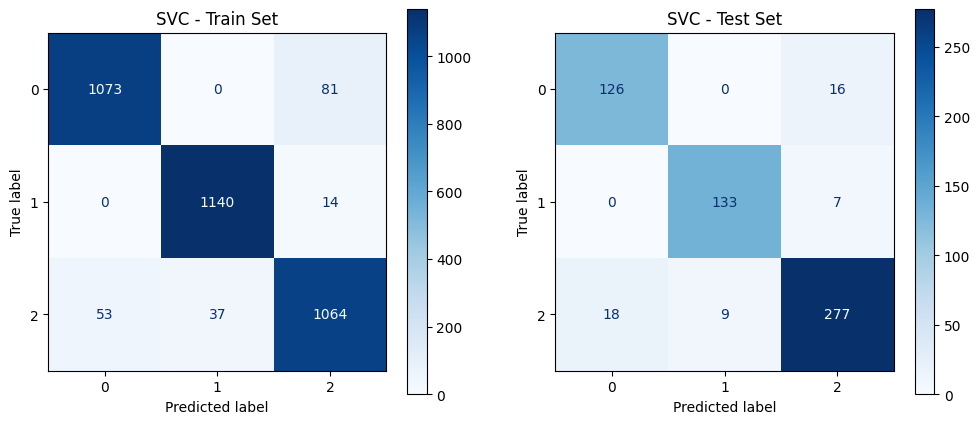

Entrenando Decision Tree...

üîπ Mejor estimador para Decision Tree:DecisionTreeClassifier(max_depth=10)
üîπ Mejores hiperpar√°metros: {'max_depth': 10, 'min_samples_split': 2}




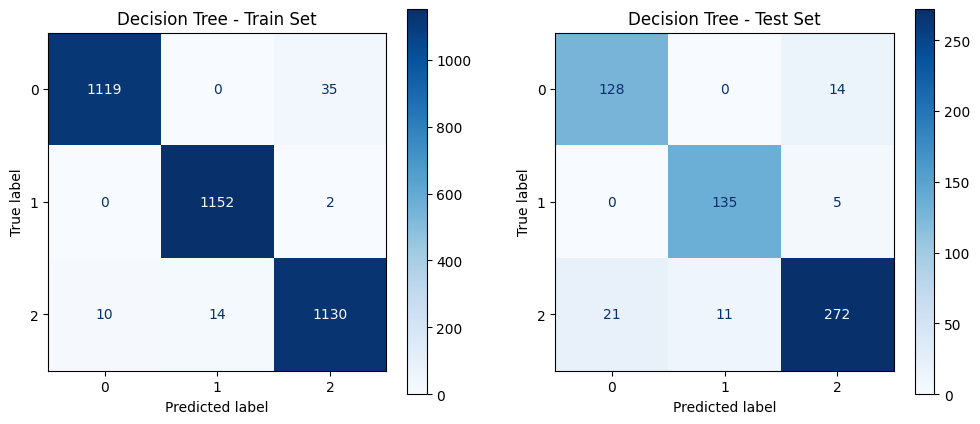

Entrenando Ridge Logit...

üîπ Mejor estimador para Ridge Logit:LogisticRegression(C=10, solver='liblinear')
üîπ Mejores hiperpar√°metros: {'C': 10}




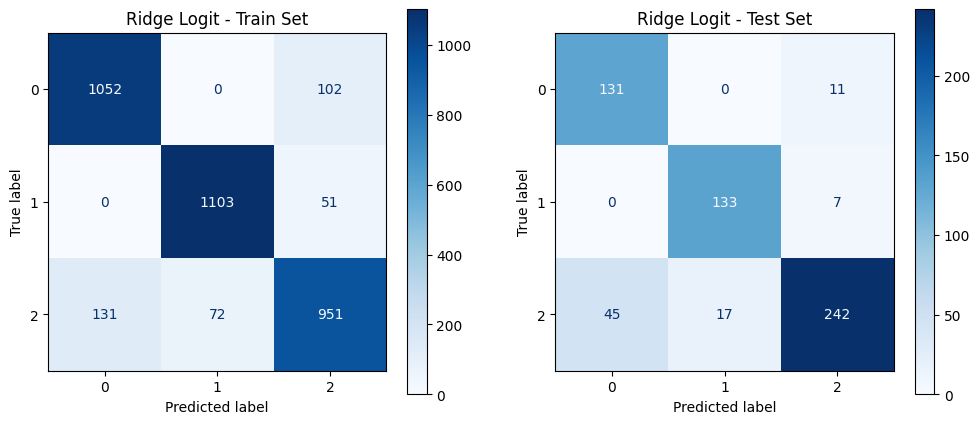

Entrenando Lasso Logit...

üîπ Mejor estimador para Lasso Logit:LogisticRegression(C=10, penalty='l1', solver='liblinear')
üîπ Mejores hiperpar√°metros: {'C': 10}




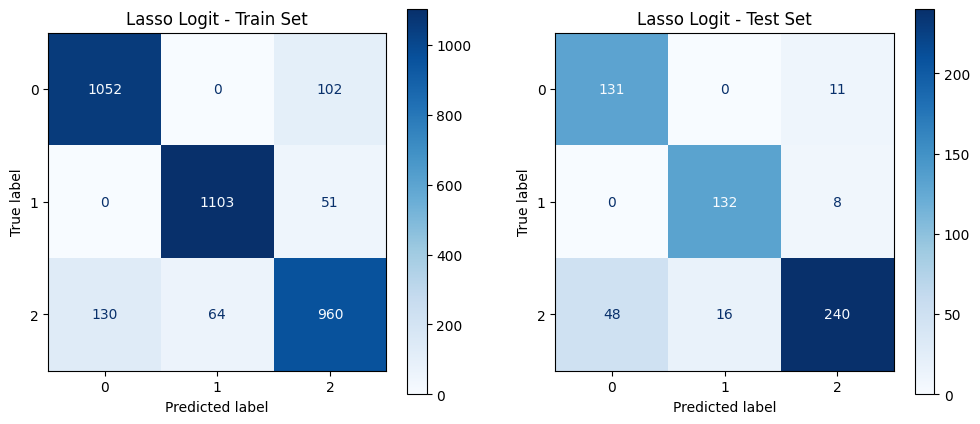

Entrenando Random Forest...

üîπ Mejor estimador para Random Forest:RandomForestClassifier(n_estimators=200, random_state=2025)
üîπ Mejores hiperpar√°metros: {'max_depth': None, 'n_estimators': 200}




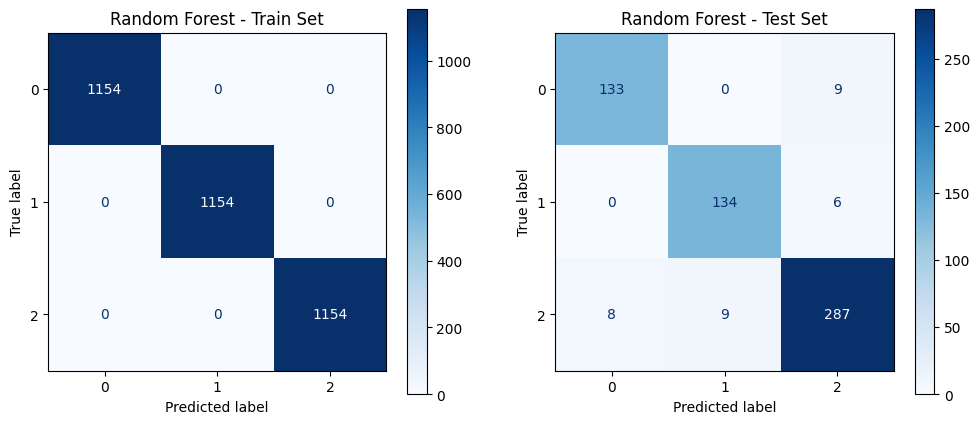

In [ ]:
# Ejecutar entrenamiento y evaluaci√≥n
classification_results, classification_best_estimators = train_and_evaluate_classification(
    classification_models, classification_param_grids,
    X_train_balanced, y_train_balanced, X_test_scaled, y_test_class
)

In [ ]:
# Convertir resultados a DataFrame y mostrar
classification_results_df = pd.DataFrame(classification_results).T
classification_results_df

Accuracy Precision    Recall  F1-Score  \
SVC            0.914676  0.914795  0.914676  0.914693   
Decision Tree  0.914676  0.916196  0.914676  0.914752   
Ridge Logit    0.863481  0.875052  0.863481  0.863971   
Lasso Logit    0.858362  0.871136  0.858362  0.859073   
Random Forest  0.945392  0.945448  0.945392  0.945387   

                                             Best Params  
SVC                           {'C': 10, 'kernel': 'rbf'}  
Decision Tree  {'max_depth': 10, 'min_samples_split': 2}  
Ridge Logit                                    {'C': 10}  
Lasso Logit                                    {'C': 10}  
Random Forest   {'max_depth': None, 'n_estimators': 200}

In [ ]:
# Graficar resultados
plt.figure(figsize=(10, 6))
classification_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12,6))
plt.title("Comparaci√≥n de Modelos de Clasificaci√≥n con M√©tricas de Desempe√±o")
plt.xlabel("Modelos")
plt.ylabel("Puntuaci√≥n")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

<Figure size 1000x600 with 0 Axes>